# IMAGE SCRAPING & CLASSIFICATION PROJECT

In [148]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

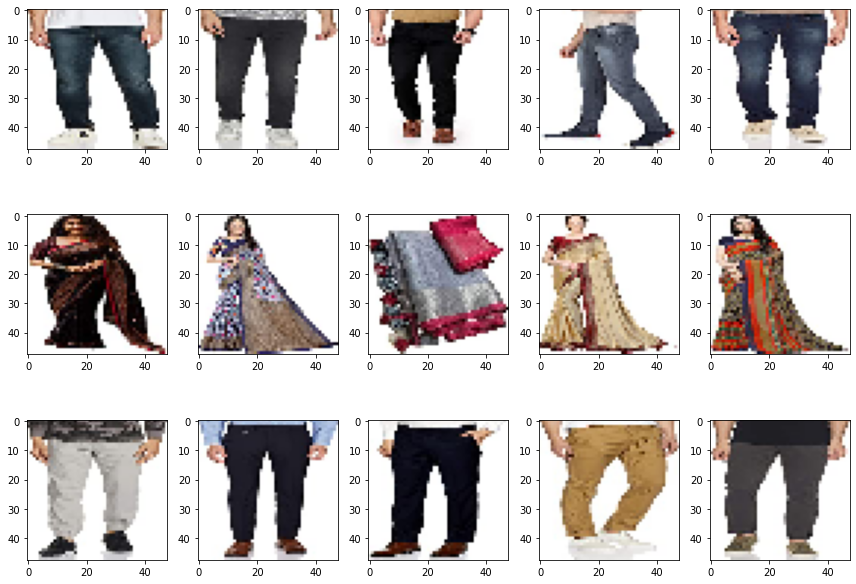

Found 2562 images belonging to 3 classes.
Found 138 images belonging to 3 classes.


In [149]:
#Loading train and test data
from keras.preprocessing.image import ImageDataGenerator
# size of the image: 48*48 pixels
pic_size = 48
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()


plt.figure(0, figsize=(12,20))
cpt = 0

base_path="E:/CHROME-DRIVER/chromedriver_win32/chromedriver.exe/Image-Scraping-and-Classification-Project--3-/Image Scraping and Classification Project/image/"

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

train_generator = datagen_train.flow_from_directory("E:/CHROME-DRIVER/chromedriver_win32/chromedriver.exe/Image-Scraping-and-Classification-Project--3-/Image Scraping and Classification Project/image/Train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory("E:/CHROME-DRIVER/chromedriver_win32/chromedriver.exe/Image-Scraping-and-Classification-Project--3-/Image Scraping and Classification Project/image/Validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

In [150]:
#number of images per class
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")


854 jeans images
854 Sarees images
854 trousers images


In [ ]:
#initializing model
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# number of possible label values
nb_classes = 3

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#running train dataset 
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

In [153]:
#saving serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

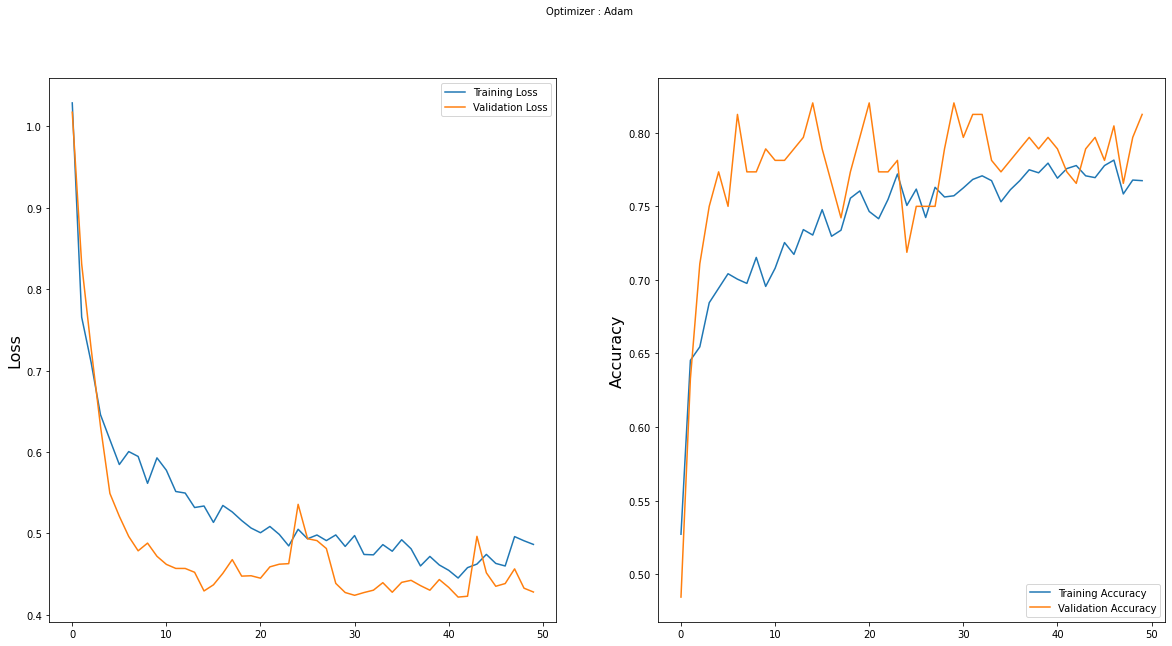

In [154]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

In [156]:
#converting prediction to readable form
Nm=validation_generator.filenames
predi=[]
for i in y_pred:
    if i==0:
        predi.append('Sarees')
    elif i==1:
        predi.append('Trousers')
    else:
        predi.append('jeans')

real=[]
for i in y_test:
    if i==0:
        real.append('Sarees')
    elif i==1:
        real.append('Trousers')
    else:
        real.append('jeans')  
        
clasfcat=pd.DataFrame({})
clasfcat['image name']=Nm
clasfcat['prediction']=predi
clasfcat['Real value']=real


        
clasfcat

,image name,prediction,Real value
0,Sarees\sarees_855.jpg,Sarees,Sarees
1,Sarees\sarees_856.jpg,Sarees,Sarees
2,Sarees\sarees_857.jpg,Sarees,Sarees
3,Sarees\sarees_858.jpg,Sarees,Sarees
4,Sarees\sarees_859.jpg,Sarees,Sarees
...,...,...,...
133,trousers\trousers (5).jpg,jeans,jeans
134,trousers\trousers (6).jpg,Trousers,jeans
135,trousers\trousers (7).jpg,Sarees,jeans
136,trousers\trousers (8).jpg,Trousers,jeans


In [157]:
#accuracy score of prediction
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8043478260869565

In [158]:
#saving prediction to csv
clasfcat.to_csv('predictionvals.csv')

<Figure size 432x288 with 0 Axes>

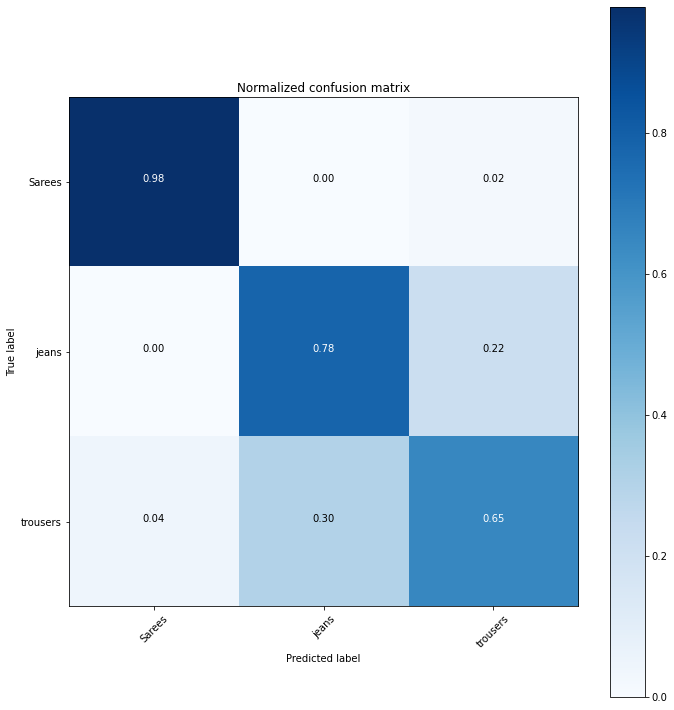

In [159]:
# show the confusion matrix of our predictions
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
#performing prediction on random images
img_path = "E:/CHROME-DRIVER/chromedriver_win32/chromedriver.exe/Image-Scraping-and-Classification-Project--3-/Image Scraping and Classification Project/test"
from PIL import Image

test_c = datagen_validation.flow_from_directory(img_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode=None,
                                                    shuffle=False)
name=test_c.filenames
l=len(name)
cc=model.predict_generator(generator=test_c,steps=l)
kk = [np.argmax(probas) for probas in cc]

In [161]:
#making prediction readable
out=[]
for i in kk:
    if i==0:
        out.append('Sarees')
    elif i==1:
        out.append('Trousers')
    else:
        out.append('jeans')
        
clasf=pd.DataFrame({})
clasf['image name']=name
clasf['type']=out


In [162]:
clasf
    

,image name,type
0,random\jeans (1).jpg,Trousers
1,random\jeans (2).jpg,jeans
2,random\jeans (3).jpg,Trousers
3,random\saree (1).jpg,Sarees
4,random\saree (2).jpg,Sarees
5,random\saree (3).jpg,Sarees
6,random\saree (4).jpg,Sarees
7,random\trousers.jpg,Trousers


In [163]:
#saving result of random predicion
clasf.to_csv('randomtests.csv')

#Conclusion


The model has a great performance for 81% accuracy  but as per observation under random images there was a point were model confuses between to Jeans and Trousers  as the input images had some similar features which was considerably difficult to distinguish between to classes. This problem can be solved with minor tweaks and using a large dataset to train the model 
